In [1]:
%load_ext gvmagic

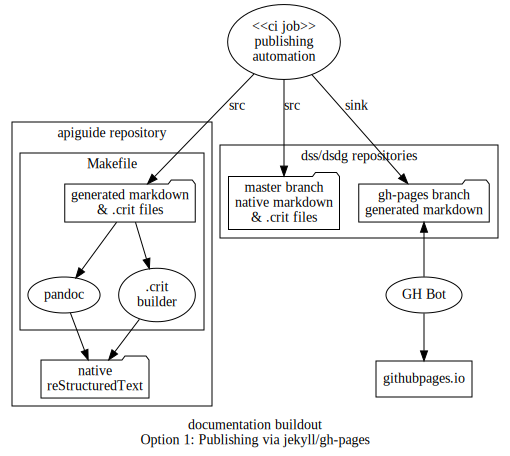

In [31]:
%%dot
digraph d {
    label = "documentation buildout\nOption 1: Publishing via jekyll/gh-pages";
    subgraph cluster_dsdg {
        label="dss/dsdg repositories";
        src_md [label="master branch\nnative markdown\n& .crit files" shape=folder];
        gh_pages [label="gh-pages branch\ngenerated markdown" shape=folder];
    }
    ci_job [label="<<ci job>>\npublishing\nautomation"];
    subgraph cluster_apiguide {
        label="apiguide repository";
        src_rst [label="native\nreStructuredText" shape=folder];
        subgraph cluster_makefile {
            label="Makefile";
            pandoc;
            dotcrit_builder [label=".crit\nbuilder"];
            generated_md [label="generated markdown\n& .crit files" shape=folder];
        }
    }
    generated_md -> dotcrit_builder -> src_rst;
    generated_md -> pandoc -> src_rst;
    
    ci_job -> gh_pages [label="sink"];
    ci_job -> src_md [label="src"];
    ci_job -> generated_md [label="src"];
    
    gh_bot [label="GH Bot"];
    ghpio [label="githubpages.io" shape=rectangle];
    gh_bot -> ghpio;
    gh_pages -> gh_bot [dir=back];
}

## target state

sub-optimal compromises:
 * apiguide authors are the only ones using the superior toolchain.
 * web authors use good-enough toolchain.
 * content managers integrated githubpages using iframes :/
 * monolithic repo containing most content

## future state

 * separate repositories for DSS and per each design guide (better versioning/release management)
 * each guide uses best tools available (for local definition of best)
 * no content management outside CI/CD buildout (git-based maintenance and release management)